# Projeto Sprint 03

[link-video](https://drive.google.com/file/d/1tfqlGrY8XD1NexSoFQrxAzzLyE52BIHA/view?usp=sharing)

In [1]:
# Instalando
%pip install duckdb
%pip install polars

# Lib para
%pip install imbalanced-learn
%pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


>Estou usando polars ao invés do pyspark pois as operações de agrupamento , seleção estava demorando muito.

Importando lib que serão utilizadas do decorrer do projeto

In [5]:
import warnings
import textwrap
import duckdb
import copy
import numpy as np
import pandas as pd
import polars as pl
from   polars import functions as f


import seaborn as sea
import matplotlib.pyplot as plt

In [6]:
warnings.filterwarnings('ignore', category=FutureWarning)

> Será refeito a importação da lib na etapa de pré-processamento

### Lendo arquivos

In [7]:
# Previous Application
path_3 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/previous_application.csv'
previous_application = pl.read_csv(path_3, low_memory=True, batch_size=32)

# POS_CASH
path_4 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/POS_CASH_balance.csv'
pos_cash = pl.read_csv(path_4, low_memory=True, batch_size=32)

# Bureau
path_5 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/bureau.csv'
bureau = pl.read_csv(path_5, low_memory=True,  batch_size=32)

# Bureau balance
path_6 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/bureau_balance.csv'
bureau_balance = pl.read_csv(path_6, low_memory=True, batch_size=32)

# Credit Card Balance
path_7 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/credit_card_balance.csv'
credit_card_balance = pl.read_csv(path_7, low_memory=True, batch_size=32)

# Installments_payments
path_8 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/installments_payments.csv'
installments_payments = pl.read_csv(path_8, low_memory=True, batch_size=32)

# Applicaiton Train
path_10 = '/content/drive/MyDrive/Dataset/ProjetoSprint03/application_train.csv'
application_train = pl.read_csv(path_10, low_memory=True, batch_size=32)

In [8]:
datasets = {
    "previous_application" : previous_application,
    "pos_cash"             : pos_cash,
    "bureau"               : bureau,
    "bureau_balance"       : bureau_balance,
    "credit_card_balance"  : credit_card_balance,
    "installments_payments": installments_payments,
    "application_train"    : application_train,
}

&nbsp;

### Limpeza dos dados

Para atributos do tipo `string` ou dados categoricos, irei verificar se há dados incosistente
> Obs: Esse processo será utilizado na pipeline do sklearn

A função `replace_na` substituirá um valor inconsistente. Esse valor indica nulos, que serão transformados em valor NA.

In [ ]:
# O parametros condicao é defini qual valor será substituido pelo NA
# Será usado o apply + lambda
def replace_na(x, condicao = 'XNA'):
    if x == condicao: return np.nan
    else:             return x

> Será usado em pipelines

In [ ]:
# Selecionando valores categoricos
atributos_categoricos = application_train.select(f.col(pl.Utf8))

In [ ]:
atributos_categoricos.head(2)

NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Cash loans""","""M""","""N""","""Y""","""Unaccompanied""","""Working""","""Secondary / se…","""Single / not m…","""House / apartm…","""Laborers""","""WEDNESDAY""","""Business Entit…","""reg oper accou…","""block of flats…","""Stone, brick""","""No"""
"""Cash loans""","""F""","""N""","""N""","""Family""","""State servant""","""Higher educati…","""Married""","""House / apartm…","""Core staff""","""MONDAY""","""School""","""reg oper accou…","""block of flats…","""Block""","""No"""


In [ ]:
# Imprimindo colunas categoricas
colunas = ', '.join(atributos_categoricos.columns)
print('Colunas categoricas\n', textwrap.fill(colunas, width=80))

Colunas categoricas
 NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE,
NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE,
OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE,
FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE


##### Coluna NAME_TYPE_SUITE

In [ ]:
# Valores unicos da coluna 'NAME_TYPE_SUITE', com isso, consigo verificar inconsistência
print(atributos_categoricos['NAME_TYPE_SUITE'].unique().to_list())

['Family', 'Unaccompanied', 'Other_A', None, 'Group of people', 'Other_B', 'Children', 'Spouse, partner']


> Não há inconsistência

##### Coluna CODE_GENDER

In [ ]:
print(atributos_categoricos['CODE_GENDER'].unique().to_list())

['M', 'XNA', 'F']


> XNA será transformado para `NAN`

In [ ]:
# map_elements é semelhante apply do pandas
application_train = application_train.with_columns(
    f.col('CODE_GENDER').map_elements(
        lambda x: replace_na(x, 'XNA')
        ).alias('CODE_GENDER')
)

In [ ]:
print(application_train['CODE_GENDER'].unique().to_list())

['M', None, 'F']


##### Coluna NAME_TYPE_SUITE

In [ ]:
print(atributos_categoricos['NAME_TYPE_SUITE'].unique().to_list())

['Other_B', 'Family', 'Spouse, partner', 'Group of people', 'Children', None, 'Other_A', 'Unaccompanied']


##### Coluna 'NAME_INCOME_TYPE'

In [ ]:
print(atributos_categoricos['NAME_INCOME_TYPE'].unique().to_list())

['Unemployed', 'Student', 'Businessman', 'Maternity leave', 'Pensioner', 'State servant', 'Working', 'Commercial associate']


##### NAME_EDUCATION_TYPE

In [ ]:
print(atributos_categoricos['NAME_EDUCATION_TYPE'].unique().to_list())

['Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Lower secondary', 'Academic degree']


##### Coluna NAME_FAMILY_STATUS

In [ ]:
print(atributos_categoricos['NAME_FAMILY_STATUS'].unique().to_list())

['Unknown', 'Civil marriage', 'Single / not married', 'Married', 'Separated', 'Widow']


O valor `Unknown` significa desconhecido essa valor será transformado para um valor nulo

In [ ]:
application_train = application_train.with_columns(
    f.col('NAME_FAMILY_STATUS').map_elements(
        lambda x: replace_na(x, 'Unknown')
        ).alias('NAME_FAMILY_STATUS')
)

In [ ]:
print(application_train['NAME_FAMILY_STATUS'].unique().to_list())

[None, 'Separated', 'Single / not married', 'Widow', 'Civil marriage', 'Married']


##### Coluna NAME_HOUSING_TYPE

In [ ]:
print(atributos_categoricos['NAME_HOUSING_TYPE'].unique().to_list())

['Co-op apartment', 'House / apartment', 'Rented apartment', 'With parents', 'Office apartment', 'Municipal apartment']


##### Coluna OCCUPATION_TYPE

In [ ]:
print(atributos_categoricos['OCCUPATION_TYPE'].unique().to_list())

['IT staff', 'Waiters/barmen staff', 'Security staff', 'Drivers', 'Managers', 'Core staff', 'Cooking staff', 'Medicine staff', 'Accountants', 'Low-skill Laborers', 'Secretaries', 'Cleaning staff', 'High skill tech staff', 'Sales staff', 'HR staff', 'Private service staff', 'Realty agents', 'Laborers', None]


##### Coluna WEEKDAY_APPR_PROCESS_START

In [ ]:
print(atributos_categoricos['WEEKDAY_APPR_PROCESS_START'].unique().to_list())

['SUNDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'MONDAY', 'TUESDAY', 'SATURDAY']


##### Coluna FONDKAPREMONT_MODE

In [ ]:
print(atributos_categoricos['FONDKAPREMONT_MODE'].unique().to_list())

['reg oper spec account', None, 'not specified', 'org spec account', 'reg oper account']


> Não especificado será transfor

In [ ]:
application_train = application_train.with_columns(
    f.col('FONDKAPREMONT_MODE').map_elements(
        lambda x: replace_na(x, 'not specified')
    ).alias('FONDKAPREMONT_MODE')
)

In [ ]:
print(application_train['FONDKAPREMONT_MODE'].unique().to_list())

['reg oper spec account', 'org spec account', None, 'reg oper account']


##### ORGANIZATION_TYPE

In [ ]:
print(application_train['ORGANIZATION_TYPE'].unique().to_list())

['Postal', 'Industry: type 6', 'Trade: type 2', 'Advertising', 'Housing', 'Business Entity Type 1', 'Trade: type 3', 'Transport: type 1', 'Legal Services', 'Industry: type 5', 'Trade: type 6', 'Industry: type 11', 'Security Ministries', 'Services', 'Trade: type 7', 'Trade: type 4', 'Industry: type 3', 'Electricity', 'Restaurant', 'Industry: type 4', 'Industry: type 7', 'Transport: type 2', 'Transport: type 4', 'Industry: type 12', 'Religion', 'Industry: type 13', 'Industry: type 2', 'Government', 'School', 'Trade: type 1', 'Business Entity Type 2', 'Security', 'Bank', 'Other', 'Military', 'University', 'Construction', 'Realtor', 'Telecom', 'Insurance', 'Medicine', 'Industry: type 8', 'Kindergarten', 'Agriculture', 'Hotel', 'Industry: type 10', 'Cleaning', 'Trade: type 5', 'Industry: type 1', 'Business Entity Type 3', 'Culture', 'Emergency', 'Mobile', 'XNA', 'Self-employed', 'Transport: type 3', 'Industry: type 9', 'Police']


Assim como na coluna CODE_GENDER o valor XNA será transformado para `NA`

In [ ]:
# Transformando XNA para na
application_train = application_train.with_columns(
    f.col('ORGANIZATION_TYPE').map_elements(
        lambda x: replace_na(x, 'XNA')
        ).alias('ORGANIZATION_TYPE')
)

In [ ]:
print(application_train['ORGANIZATION_TYPE'].unique().to_list())

['Services', 'Bank', 'Trade: type 7', 'Legal Services', 'School', 'Restaurant', 'Agriculture', 'Industry: type 7', 'Trade: type 4', 'Emergency', 'Realtor', 'Electricity', 'Industry: type 2', 'Security', 'Government', 'Trade: type 2', 'Trade: type 1', 'Trade: type 6', 'Insurance', 'Industry: type 6', None, 'University', 'Cleaning', 'Self-employed', 'Security Ministries', 'Transport: type 1', 'Police', 'Military', 'Telecom', 'Other', 'Kindergarten', 'Advertising', 'Religion', 'Industry: type 4', 'Business Entity Type 2', 'Housing', 'Business Entity Type 1', 'Industry: type 8', 'Trade: type 3', 'Culture', 'Industry: type 13', 'Trade: type 5', 'Industry: type 12', 'Transport: type 4', 'Industry: type 5', 'Industry: type 1', 'Industry: type 10', 'Transport: type 3', 'Construction', 'Industry: type 11', 'Business Entity Type 3', 'Industry: type 9', 'Hotel', 'Transport: type 2', 'Industry: type 3', 'Postal', 'Mobile', 'Medicine']


##### Coluna HOUSETYPE_MODE

In [ ]:
print(application_train['HOUSETYPE_MODE'].unique().to_list())

['terraced house', 'block of flats', None, 'specific housing']


##### Coluna WALLSMATERIAL_MODE

In [ ]:
print(application_train['WALLSMATERIAL_MODE'].unique().to_list())

['Monolithic', 'Block', 'Others', 'Panel', 'Stone, brick', None, 'Mixed', 'Wooden']


##### Coluna EMERGENCYSTATE_MODE

In [ ]:
print(application_train['EMERGENCYSTATE_MODE'].unique().to_list())

['No', None, 'Yes']


In [ ]:
print(bureau.select(f.col(pl.Utf8)).columns)

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'AMT_ANNUITY']


#### Para o dataset bureau

In [ ]:
for values in bureau.select(f.col(pl.Utf8)).columns[0:4]:
    print(values,': \n', bureau[values].unique().to_list())

CREDIT_ACTIVE : 
 ['Active', 'Sold', 'Closed', 'Bad debt']
CREDIT_CURRENCY : 
 ['currency 4', 'currency 2', 'currency 3', 'currency 1']
CREDIT_TYPE : 
 ['Mobile operator loan', 'Loan for purchase of shares (margin lending)', 'Interbank credit', 'Credit card', 'Unknown type of loan', 'Cash loan (non-earmarked)', 'Another type of loan', 'Mortgage', 'Consumer credit', 'Loan for the purchase of equipment', 'Real estate loan', 'Car loan', 'Loan for working capital replenishment', 'Loan for business development', 'Microloan']
AMT_ANNUITY : 
 ['16295.265', '9530.64', '14814.0', '80676.0', '88398.0', '3465.0', '6543.0', '6203.61', '33718.5', '108495.0', '222565.5', '101965.5', '3892.5', '5514.21', '45810.0', '61749.0', '50125.5', '7588.98', '44199.0', '100044.0', '124087.5', '2832.39', '35235.0', '52668.0', '2235.285', '11111.985', '10290.42', '5705.1', '25236.0', '10689.12', '9555.75', '14566.5', '29189.205', '44030.79', '51425.775', '5116.14', '5902.38', '36189.0', '11844.315', '6368.355', '

Coluna AMT_ANNUITY que é para ser to tipo int está sendo tipo string será tratado

In [ ]:
def bureau__AMT_ANNUITY_to_int(x):
    try   :            return float(x)
    except Exception:  return x


bureau = bureau.with_columns(
    f.col('AMT_ANNUITY').map_elements(
        lambda x: bureau__AMT_ANNUITY_to_int(x)
    ).alias('AMT_ANNUITY')
)

#### Para previous_application

In [ ]:
colunas_previous = previous_application.select(f.col(pl.Utf8)).columns
for values in colunas_previous:
    print(values,': \n', previous_application[values].unique().to_list())

NAME_CONTRACT_TYPE : 
 ['Revolving loans', 'Cash loans', 'Consumer loans', 'XNA']
WEEKDAY_APPR_PROCESS_START : 
 ['MONDAY', 'SATURDAY', 'FRIDAY', 'SUNDAY', 'TUESDAY', 'THURSDAY', 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT : 
 ['N', 'Y']
NAME_CASH_LOAN_PURPOSE : 
 ['Hobby', 'Repairs', 'Everyday expenses', 'Buying a new car', 'Gasification / water supply', 'Business development', 'Buying a garage', 'XNA', 'Money for a third person', 'Furniture', 'Buying a home', 'Buying a holiday home / land', 'Buying a used car', 'Wedding / gift / holiday', 'Purchase of electronic equipment', 'Building a house or an annex', 'Payments on other loans', 'Car repairs', 'Journey', 'Education', 'Other', 'Medicine', 'Urgent needs', 'XAP', 'Refusal to name the goal']
NAME_CONTRACT_STATUS : 
 ['Refused', 'Canceled', 'Approved', 'Unused offer']
NAME_PAYMENT_TYPE : 
 ['XNA', 'Cash through the bank', 'Cashless from the account of the employer', 'Non-cash from your account']
CODE_REJECT_REASON : 
 ['LIMIT', 'CLIENT', 

Nas coluna NAME_CONTRACT_TYPE, NAME_LOAN_PURPOSE,.... tem a mesma incosistencia de algumas colunas de outro dataset no que se refere ao valor `XNA`, então passaram pelo  mesmo processo de tratamento:

* XNA --> NA

In [ ]:
# Tranformando o valor xna em NA
previous_application = previous_application.with_columns(
    (
        (f.col(col).map_elements(
            lambda x: replace_na(x, 'XNA')
        ).alias(col)) for col in colunas_previous
    )
)

#### Para credit_card_balance

In [ ]:
for values in credit_card_balance.select(f.col(pl.Utf8)).columns:
    print(values,': \n', credit_card_balance[values].unique().to_list())

NAME_CONTRACT_STATUS : 
 ['Signed', 'Active', 'Refused', 'Approved', 'Demand', 'Sent proposal', 'Completed']


#### Para pos_cash

In [ ]:
for values in pos_cash.select(f.col(pl.Utf8)).columns:
    print(values,': \n', pos_cash[values].unique().to_list())

NAME_CONTRACT_STATUS : 
 ['Completed', 'Amortized debt', 'Demand', 'Signed', 'Approved', 'XNA', 'Returned to the store', 'Canceled', 'Active']


In [ ]:
pos_cash = pos_cash.with_columns(
    f.col('NAME_CONTRACT_STATUS').map_elements(
        lambda x: replace_na(x, 'XNA')
    ).alias('NAME_CONTRACT_STATUS')
)

&nbsp;

### Analise exploratoria dos dados

In [ ]:
# Fazendo amostragem do dataset aplication_train
train_sample = application_train.sample(n=100_000, seed=42)

In [ ]:
train_sample.shape

(100000, 122)

In [ ]:
train_sample.head(2)

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,…,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
i64,i64,str,str,str,str,i64,f64,f64,f64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,str,f64,i64,i64,str,i64,i64,i64,i64,…,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64
156748,0,"""Cash loans""","""F""","""N""","""N""",0,119250.0,900000.0,24880.5,900000.0,"""Unaccompanied""","""Working""","""Higher educati…","""Single / not m…","""House / apartm…",0.026392,-9804,-257,-4442.0,-2484,null,1,1,1,1,1,0,"""High skill tec…",1.0,2,2,"""FRIDAY""",12,0,0,0,…,0.0867,null,"""block of flats…",0.15,"""Panel""","""No""",3.0,0.0,3.0,0.0,-2187.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
205528,0,"""Cash loans""","""M""","""N""","""Y""",0,180000.0,279517.5,31666.5,265500.0,"""Family""","""Working""","""Secondary / se…","""Civil marriage…","""House / apartm…",0.020713,-21595,-2527,-6647.0,-2325,null,1,1,0,1,0,0,"""Drivers""",2.0,3,2,"""SATURDAY""",6,0,0,0,…,0.0,"""reg oper accou…","""block of flats…",0.0693,"""Panel""","""No""",1.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Quantidade de instancias por datasets

In [ ]:
dicio = {'Dataset':[],'Instancias':[], 'Colunas':[], 'batch_size':[]}
index = []

for e, (key, value) in enumerate(datasets.items()):
    x, y = value.shape

    dicio['Dataset'].append(key)
    dicio['Instancias'].append(x)
    dicio['Colunas'].append(y)
    dicio['batch_size'].append( x//10 if e==6 else x//32 )

pd.DataFrame(dicio).sort_values(by='Instancias', ascending=False)

,Dataset,Instancias,Colunas,batch_size
3,bureau_balance,27299925,3,853122
5,installments_payments,13605401,8,425168
1,pos_cash,10001358,8,312542
4,credit_card_balance,3840312,23,120009
2,bureau,1716428,17,53638
0,previous_application,1670214,37,52194
6,application_train,307511,122,30751


Verificando Chave estrangeira

In [ ]:
print("> Chave estrangeira SK_ID_CURR")
for key, data in datasets.items():

    try:
        tamanho = data['SK_ID_CURR'].unique().shape[0:][0]
        shape   = data['SK_ID_CURR'].shape[0]
        print(f"  * {key:<22}: {tamanho} únicos, {round((tamanho/shape)*100,1)}%")
    except:
        print(end='')

> Chave estrangeira SK_ID_CURR
  * previous_application  : 338857 únicos, 20.3%
  * pos_cash              : 337252 únicos, 3.4%
  * bureau                : 305811 únicos, 17.8%
  * credit_card_balance   : 103558 únicos, 2.7%
  * installments_payments : 339587 únicos, 2.5%
  * application_train     : 307511 únicos, 100.0%


In [ ]:
print("> Chave estrangeira SK_ID_PREV")
for key, data in datasets.items():

    try:
        tamanho = data['SK_ID_PREV'].unique().shape[0:][0]
        shape   = data['SK_ID_PREV'].shape[0]
        print(f"  * {key:<22}: {tamanho} únicos, {round((tamanho/shape)*100,1)}%")
    except:
        print(end='')

> Chave estrangeira SK_ID_PREV
  * previous_application  : 1670214 únicos, 100.0%
  * pos_cash              : 936325 únicos, 9.4%
  * credit_card_balance   : 104307 únicos, 2.7%
  * installments_payments : 997752 únicos, 7.3%


Valores nulos

In [ ]:
# Verificando a quantidade de valores nulos de cada coluna
quantidade_nulos = application_train.null_count()\
                    .transpose(include_header=True)

# Pegando as colunas que não tem valores nulos
nao_tem_nulos = quantidade_nulos.filter(f.col('column_0')==0)['column'].to_pandas()
nao_tem_nulos = nao_tem_nulos.str.title()

# Selecionado as colunas com a quantidade de nulos maior que zero
quantidade_nulos = quantidade_nulos.filter(f.col('column_0')!=0)


# Fazendo a porcentagem de nulos para amostra
quantidade_nulos = quantidade_nulos.select(f.col('column'),(f.col('column_0')/307511)*100)

No dataset `quantidade_nulos`, tem colunas que possuem o mesma quantidade de valores nulos e também são colunas possuem nomes semelhantes mundado só uma palavra como, a exemplo do atributo:
  * AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, ....

A ideia e unir essa colunas e colocar ao final de cada palavra a diferenças delas
  - AMT_REQ_CREDIT_BUREAU HOUR|DAY|MONTH....

> Dessa forma eu melhor a visualização

In [ ]:
# Ordenando os valores
quantidade_nulos = quantidade_nulos.with_columns( rank=f.col('column_0').rank('dense')).sort('rank')

In [ ]:
dicio = {
    'colunas':[], 'porcentagem':[]
}
for ranking in quantidade_nulos['rank'].unique().to_list():
    df_aux = quantidade_nulos.filter(f.col('rank')==ranking)
    n_linhas = len(df_aux)

    if n_linhas == 1:
        dicio['colunas'].append(df_aux['column'][0])
        dicio['porcentagem'].append(df_aux['column_0'][0])
    # Se houver mais de 1 linhas a operação abaixo se encarrega de
    # unir as string
    else:
        # Será usado conj. para fazer essa operação
        diferenca = set()
        colunas   = df_aux['column'].to_list()

        # Verifica a diferença de caracteres na string
        for palavra_i in colunas:
            # transforma primeiro em uma lista dps em um conj
            set_i = set(palavra_i.split('_'))
            for palavra_j in colunas:
                set_j = set(palavra_j.split('_'))
                diferenca = diferenca.union(set_j - set_i)


        colunas = [ i for i in colunas[0].split('_') if i not in diferenca]
        colunas = '_'.join(colunas)+' '+ "\\ ".join(diferenca)

        dicio['colunas'].append(colunas)
        dicio['porcentagem'].append(df_aux['column_0'][0])


n_quantidade_nulos = pd.DataFrame(dicio)
n_quantidade_nulos['colunas'] = n_quantidade_nulos['colunas'].str.title()
n_quantidade_nulos.sort_values(by='porcentagem', ascending=False, inplace=True)

In [ ]:
coll_remove = quantidade_nulos.filter(f.col('column_0')>15)['column']

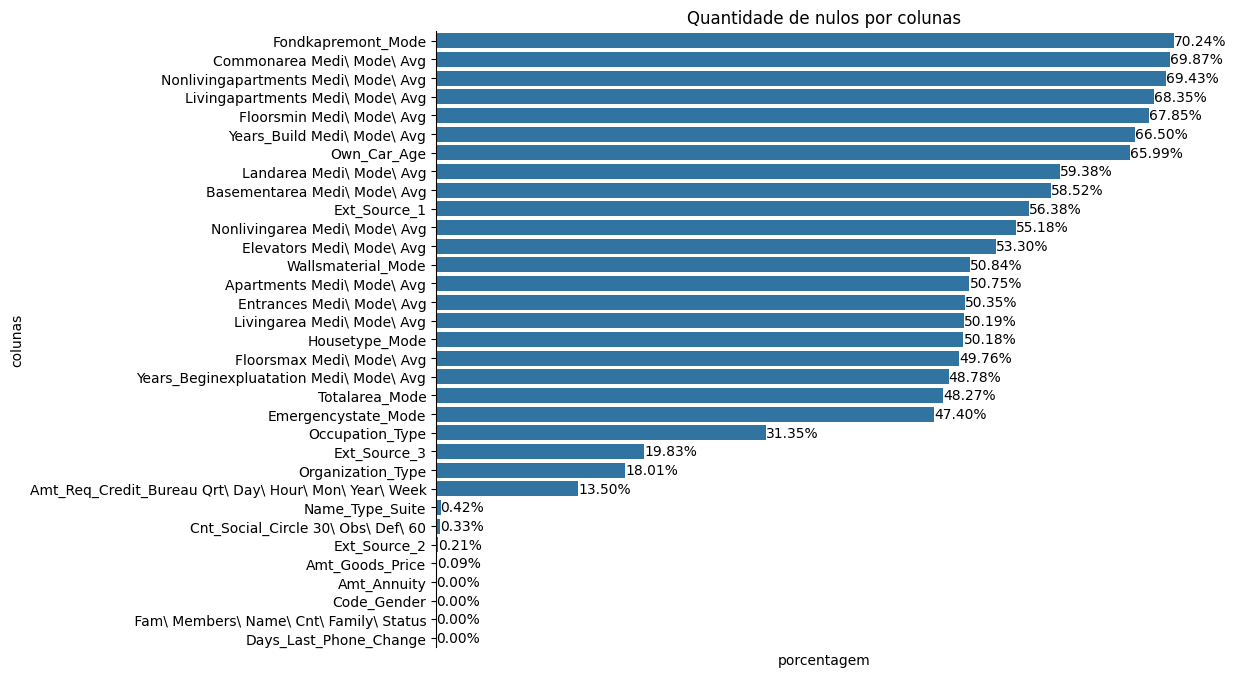

In [ ]:
fig = plt.figure(figsize=(10,8))

params = dict(
    x = n_quantidade_nulos['porcentagem'],
    y = n_quantidade_nulos['colunas'],
)

bar = sea.barplot(**params)
#Colocando anotação no grafico de barra
for p in bar.patches:
    params_annotate = dict(
        xy     = ( p.get_width(), p.get_y() + p.get_height() / 2),
        xytext = (0, 0.1), textcoords= 'offset points',
        ha     = 'left', va = "center", size=10
    )
    bar.annotate("%.2f" % p.get_width() + '%', **params_annotate)

plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)
plt.title('Quantidade de nulos por colunas')
plt.xticks([])
plt.show()

> Há muita colunas com uma alta porcentagem de valores nulos, nos quais serão removidos ou imputados durante a etapa de pré-processamento

In [ ]:
print(
    'Serão removidas na etapa de pré-processamento cerca de :',
    quantidade_nulos.filter(f.col('column_0')>15).shape[0]
)

Serão removidas na etapa de pré-processamento cerca de : 49


Colunas que não tem valores nulos

In [ ]:
nao_tem_nulos.reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
index,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
column,Sk_Id_Curr,Target,Name_Contract_Type,Flag_Own_Car,Flag_Own_Realty,Cnt_Children,Amt_Income_Total,Amt_Credit,Name_Income_Type,Name_Education_Type,...,Flag_Document_12,Flag_Document_13,Flag_Document_14,Flag_Document_15,Flag_Document_16,Flag_Document_17,Flag_Document_18,Flag_Document_19,Flag_Document_20,Flag_Document_21


Proporção de valores da coluna `TARGET`

In [ ]:
# Agrupamento target em relação a quantidade de TARGET
query = '''
    SELECT TARGET, COUNT(TARGET) AS count FROM train_sample
    GROUP BY TARGET
'''
target_count = duckdb.sql(query).df()

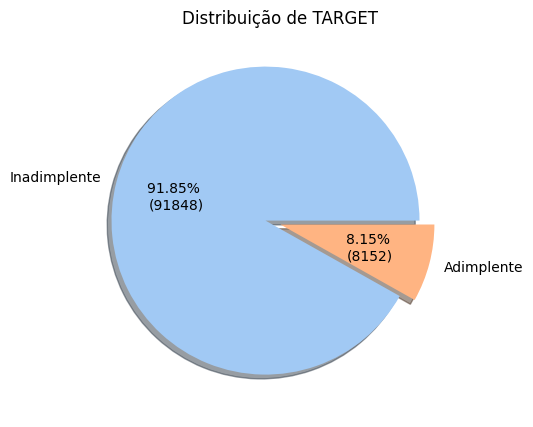

In [ ]:
sea.reset_orig()
color = sea.color_palette('pastel', n_colors=2)
params = dict(
    x = target_count['count'],
    labels = ['Adimplente', 'Inadimplente'][::-1],
    autopct = lambda x:'{:.2f}% \n({:.0f})'.format(x, target_count['count'].sum()*(x/100)),
    explode = [0.1, 0],
    colors  = color, shadow=True,
)

plt.figure(figsize=(10,5))
plt.pie(**params)
plt.title('Distribuição de TARGET')
plt.show()

> Os dados do atributo `TARGET` estão desbalanceados, com isso, se faz necessario uma undersampling:
>    * RandomUnderSampling
>    * Tomeklinks
>    * Outros que podem ser aplicados no decorrer da etapa de pré-processamento

Verificando a quantidade de solicitações durante a semana em relação TARGET

In [ ]:
# Modifiquei  valor da target, 0 = Adimplente e 1 = Inadiplente
# Agrupamento TARGET e dias da semana em relação a quantidade de dias da semana
query = '''
    SELECT CASE
            WHEN TARGET == 0 THEN 'Adimplente'
            WHEN TARGET == 1 THEN 'Inadimplente'
        END AS TARGET,
    WEEKDAY_APPR_PROCESS_START, COUNT(WEEKDAY_APPR_PROCESS_START) AS count FROM train_sample AS ts
    GROUP BY TARGET, WEEKDAY_APPR_PROCESS_START
    ORDER BY count DESC
'''

# Fazendo essa operação no duckdb e passando para python
dias_soliciatacao = duckdb.sql(query).df()

# Modificando o estilo do texto do `dias da semana` para melhor visualização no gráfico
dias_soliciatacao['WEEKDAY_APPR_PROCESS_START'] = dias_soliciatacao['WEEKDAY_APPR_PROCESS_START'].str.title()

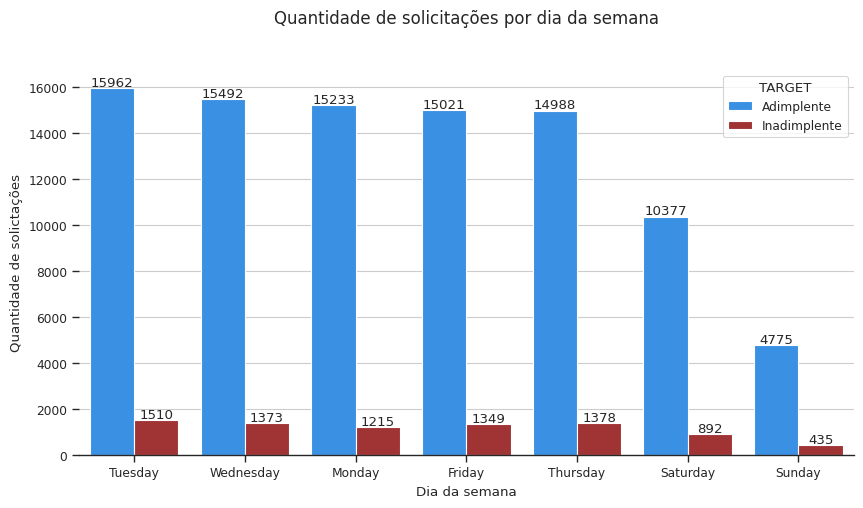

In [ ]:
sea.set_theme(context='paper', style='ticks')
plt.figure(figsize=(10,5))
# Paramtros do grafico de barras
params = dict(
    x = dias_soliciatacao['WEEKDAY_APPR_PROCESS_START'],
    y = dias_soliciatacao['count'],
    hue = dias_soliciatacao['TARGET'],
    palette = ['dodgerblue','firebrick']
)
bar = sea.barplot(**params)

#Colocando anotação no grafico
for p in bar.patches:
    params_annotate = dict(
        xy     = ( p.get_x() + p.get_width()/2, p.get_height() ),
        xytext = (0, 4), textcoords= 'offset points',  ha='center', va='center')
    if p.get_height() != 0:
        bar.annotate("%.0f" % p.get_height(), **params_annotate)

# Removendo o spines do grafico
plt.gca().spines[['top', 'right','left']].set_visible(False)
# Colocando linhas horizontais por detras das barras
plt.gca().grid(True, axis='y')
# Titulo y
plt.ylabel('Quantidade de solictações')
# Titulo x
plt.xlabel('Dia da semana')
# Titulo de grafico
plt.title('Quantidade de solicitações por dia da semana', fontsize=12, y=1.1)

plt.show()

> O Inadiplentes estão mais concentrados nos de segunda a sexta assim como os adimplentes

In [ ]:
# Essa operação sql faz a média de prologanneot
query = '''
    SELECT CASE
        WHEN TARGET == 0 THEN 'Adimplente'
        WHEN TARGET == 1 THEN 'Inadimplente'
    END AS TARGET
    , ROUND(MEAN(total_prologamento),4) AS media_prologamento_do_credito
    FROM
    (
        SELECT ts.SK_ID_CURR, AVG(TARGET) AS TARGET,
            SUM(CNT_CREDIT_PROLONG) AS total_prologamento
        FROM train_sample AS ts
            INNER JOIN bureau AS b
                ON ts.SK_ID_CURR = b.SK_ID_CURR
        GROUP BY ts.SK_ID_CURR, TARGET
        )
    GROUP BY TARGET
'''

media  = duckdb.sql(query).df()

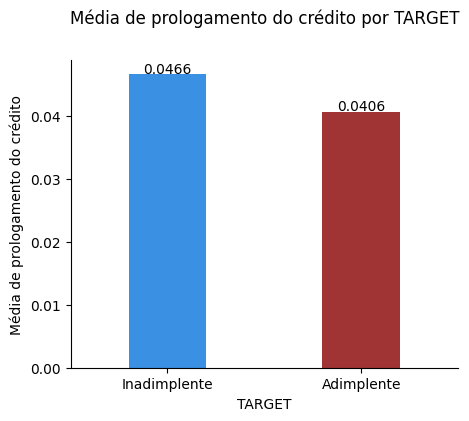

In [ ]:
sea.reset_orig()
plt.figure(figsize=(5,4))
params =dict(
    x = media['TARGET'],
    y = media['media_prologamento_do_credito'],
    hue = media['TARGET'],
    width = 0.4,
    palette = ['dodgerblue','firebrick']
)

bar = sea.barplot(**params)
for p in bar.patches:
    params_annotate = dict(
            xy     = ( p.get_x() + p.get_width()/2, p.get_height() ),
            xytext = (0, 4), textcoords= 'offset points',  ha='center', va='center'
            )
    if p.get_height() != 0: bar.annotate("%.4f" % p.get_height(), **params_annotate)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ylabel('Média de prologamento do crédito')
plt.xlabel('TARGET')
plt.title('Média de prologamento do crédito por TARGET', y=1.09)


plt.show()

> Podemos ver que há um pequeno aumento na média do prologamento do número de vezes Credito

In [ ]:
# Verificando a quantidade de valores nulos de cada coluna
quantidade_nulos = bureau.null_count()\
                    .transpose(include_header=True)

# Pegando as colunas que não tem valores nulos
nao_tem_nulos = quantidade_nulos.filter(f.col('column_0')==0)['column'].to_pandas()
nao_tem_nulos = nao_tem_nulos.str.title()

# Selecionado as colunas com a quantidade de nulos maior que zero
quantidade_nulos = quantidade_nulos.filter(f.col('column_0')!=0)


# Fazendo a porcentagem de nulos para amostra
quantidade_nulos = quantidade_nulos.select(f.col('column'),(f.col('column_0')/bureau.shape[0])*100)
quantidade_nulos = quantidade_nulos.sort(by='column_0', descending=True)

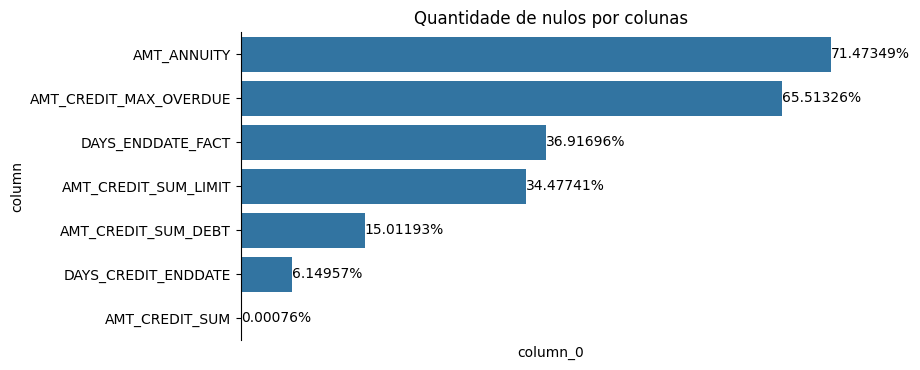

In [ ]:
fig = plt.figure(figsize=(8,4))

params = dict(
    x = quantidade_nulos['column_0'],
    y = quantidade_nulos['column'],
)

bar = sea.barplot(**params)
#Colocando anotação no grafico de barra
for p in bar.patches:
    params_annotate = dict(
        xy     = ( p.get_width(), p.get_y() + p.get_height() / 2),
        xytext = (0, 0.1), textcoords= 'offset points',
        ha     = 'left', va = "center", size=10
    )
    bar.annotate("%.5f" % p.get_width() + '%', **params_annotate)

plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)
plt.title('Quantidade de nulos por colunas')
plt.xticks([])
plt.show()

In [ ]:
# Colunas que não possuem valores nulos
print(nao_tem_nulos)

0                Sk_Id_Curr
1              Sk_Id_Bureau
2             Credit_Active
3           Credit_Currency
4               Days_Credit
5        Credit_Day_Overdue
6        Cnt_Credit_Prolong
7    Amt_Credit_Sum_Overdue
8               Credit_Type
9        Days_Credit_Update
Name: column, dtype: object


> Caso eu utilize bureau dataset para o modelo as colunas acima de 15% serão removidas

In [ ]:
# Essa função será reutilizada na etapa de preprocessamento
def bureau_credit_active(bureau, train):
    # Copiando o valor
    bureau_n = copy.deepcopy(bureau)
    X_train_n  = copy.deepcopy(train)

    # Pegando a chave estrangeira do dataset train|test|predict
    X_pk       = X_train_n['SK_ID_CURR'].unique()
    bureau_n = bureau_n.filter(f.col('SK_ID_CURR').is_in(X_pk)).to_pandas()

    # Encontrar todas as categorias únicas na coluna B
    all_categories = bureau_n['CREDIT_ACTIVE'].unique()

    # Agrupando por 'A' e contando os valores de 'B'
    agrupado = bureau_n.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].value_counts().unstack(fill_value=0)

    # Garantir que todas as categorias estejam presentes
    agrupado = agrupado.reindex(columns=all_categories, fill_value=0)

    # Convertendo o resultado para dicionário
    result = {index: row.to_dict() for index, row in agrupado.iterrows()}
    nova_tabela = pd.DataFrame(result).T.reset_index()
    display(nova_tabela.iloc[0:1,:])

    return pl.from_pandas(nova_tabela)

In [ ]:
bureau_credict_ative = bureau_credit_active(bureau, train_sample)

,index,Closed,Active,Sold,Bad debt
0,100002,6,2,0,0


In [ ]:
query = '''
    SELECT CASE
        WHEN TARGET == 0 THEN 'Adimplente'
        WHEN TARGET == 1 THEN 'Inadimplente'
    END AS TARGET,
    MEAN(b.Closed) AS fechado,
    MEAN(b.Active) AS ativo,
    MEAN(b.Sold) AS vendido,
    MEAN("Bad debt") AS "divida ruim"
        FROM train_sample AS ts
            INNER JOIN bureau_credict_ative AS b
                ON ts.SK_ID_CURR = b.index
        GROUP BY ts.TARGET
'''
display(duckdb.sql(query))
df = duckdb.sql(query).df()

┌──────────────┬────────────────────┬───────────────────┬─────────────────────┬────────────────────────┐
│    TARGET    │      fechado       │       ativo       │       vendido       │      divida ruim       │
│   varchar    │       double       │      double       │       double        │         double         │
├──────────────┼────────────────────┼───────────────────┼─────────────────────┼────────────────────────┤
│ Adimplente   │ 3.5080054720948497 │ 2.016783624249487 │ 0.02112836622501457 │ 5.0667544904111675e-05 │
│ Inadimplente │  3.124475104979004 │ 2.454109178164367 │ 0.02444511097780444 │                    0.0 │
└──────────────┴────────────────────┴───────────────────┴─────────────────────┴────────────────────────┘

In [ ]:
df = pd.melt(df, id_vars='TARGET')

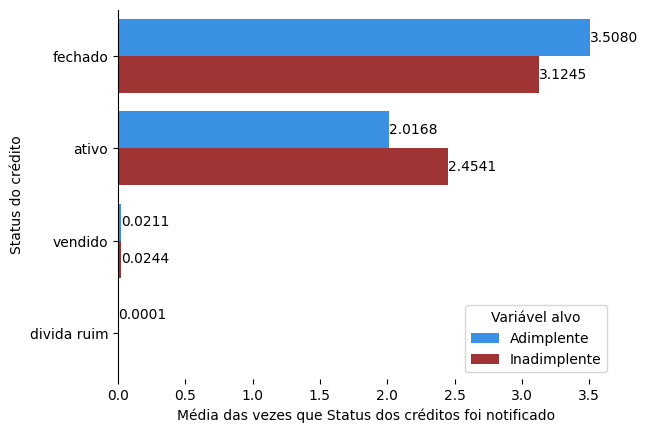

In [ ]:
sea.reset_orig()
params = dict(
    y = df['variable'],
    x = df['value'],
    hue = df['TARGET'],
    palette = ['dodgerblue','firebrick']
)

bar = sea.barplot(**params)
#Colocando anotação no grafico de barra
for p in bar.patches:
    params_annotate = dict(
        xy     = ( p.get_width(), p.get_y() + p.get_height() / 2),
        xytext = (0, 0.1), textcoords= 'offset points',
        ha     = 'left', va = "center", size=10
    )
    if p.get_width() != 0:
        bar.annotate("%.4f" % p.get_width(), **params_annotate)

plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)
plt.xlabel('Média das vezes que Status dos créditos foi notificado')
plt.ylabel('Status do crédito')
plt.legend(loc='lower right', title='Variável alvo')
plt.show()

#### installments payments

In [ ]:
# Verificando a quantidade de valores nulos de cada coluna
quantidade_nulos = installments_payments.null_count()\
                    .transpose(include_header=True)

# Pegando as colunas que não tem valores nulos
nao_tem_nulos = quantidade_nulos.filter(f.col('column_0')==0)['column'].to_pandas()
nao_tem_nulos = nao_tem_nulos

# Selecionado as colunas com a quantidade de nulos maior que zero
quantidade_nulos = quantidade_nulos.filter(f.col('column_0')!=0)


# Fazendo a porcentagem de nulos para amostra
quantidade_nulos = quantidade_nulos.select(f.col('column'),(f.col('column_0')/bureau.shape[0])*100)
quantidade_nulos = quantidade_nulos.sort(by='column_0', descending=True)

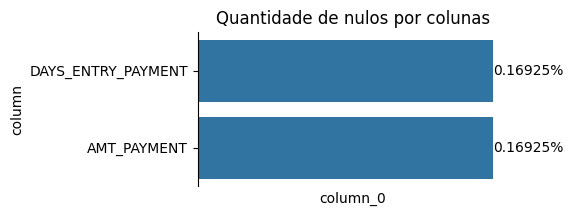

In [ ]:
fig = plt.figure(figsize=(4,2))

params = dict(
    x = quantidade_nulos['column_0'],
    y = quantidade_nulos['column'],
)

bar = sea.barplot(**params)
#Colocando anotação no grafico de barra
for p in bar.patches:
    params_annotate = dict(
        xy     = ( p.get_width(), p.get_y() + p.get_height() / 2),
        xytext = (0, 0.1), textcoords= 'offset points',
        ha     = 'left', va = "center", size=10
    )
    bar.annotate("%.5f" % p.get_width() + '%', **params_annotate)

plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)
plt.title('Quantidade de nulos por colunas')
plt.xticks([])
plt.show()

In [ ]:
nao_tem_nulos

0                SK_ID_PREV
1                SK_ID_CURR
2    NUM_INSTALMENT_VERSION
3     NUM_INSTALMENT_NUMBER
4           DAYS_INSTALMENT
5            AMT_INSTALMENT
Name: column, dtype: object

' NUM_INSTALMENT_VERSION' : Versão do calendário de parcelamento (0 é para cartão de crédito) do crédito anterior. Alteração da versão do parcelamento mês a mês significa que algum parâmetro do calendário de pagamento foi alterado

In [ ]:
# Quantas versões o cliente teve
query = '''

SELECT SK_ID_CURR, SUM( DISTINCT NUM_INSTALMENT_VERSION) AS quantidade_versoes FROM installments_payments AS ip
    GROUP BY SK_ID_CURR
'''
quantidade = duckdb.sql(query).pl()

# Quantidade média de versões
query = '''
SELECT ts.TARGET, MEAN(q.quantidade_versoes) FROM train_sample AS ts
    INNER JOIN quantidade AS q
        ON ts.SK_ID_CURR = q.SK_ID_CURR
    GROUP BY ts.TARGET
'''
quantidade = duckdb.sql(query).df()

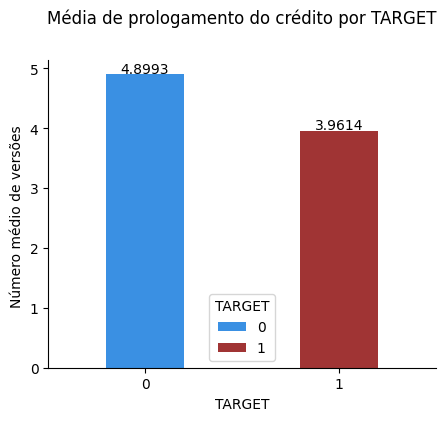

In [ ]:
sea.reset_orig()
plt.figure(figsize=(5,4))
params =dict(
    x = quantidade['TARGET'],
    y = quantidade['mean(q.quantidade_versoes)'],
    hue = quantidade['TARGET'],
    width = 0.4,
    palette = ['dodgerblue','firebrick']
)

bar = sea.barplot(**params)
for p in bar.patches:
    params_annotate = dict(
            xy     = ( p.get_x() + p.get_width()/2, p.get_height() ),
            xytext = (0, 4), textcoords= 'offset points',  ha='center', va='center'
            )
    if p.get_height() != 0: bar.annotate("%.4f" % p.get_height(), **params_annotate)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ylabel('Número médio de versões ')
plt.xlabel('TARGET')
plt.title('Média de prologamento do crédito por TARGET', y=1.09)


plt.show()

&nbsp;

## Pré-processamentos

In [9]:
import copy
import textwrap

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base     import TransformerMixin, BaseEstimator

# Algoritmos
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.svm import LinearSVC

# Cross-validation e Dividir base de test e train
from sklearn.model_selection import StratifiedShuffleSplit, RepeatedKFold, KFold
from sklearn.utils.class_weight import compute_class_weight

# Best Hiperamatros
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss
from imblearn.over_sampling  import SMOTE

# ROC-AUC,
from yellowbrick.classifier import ROCAUC

from sklearn.metrics import *

In [10]:
application_train = pl.read_csv(path_10, low_memory=True, batch_size=32)
bureau = pl.read_csv(path_5, low_memory=True, batch_size=32)

### Definido base de treinamento e de teste

In [11]:
# Primeiro irei pergar os indices de train e test com base em uma amostragem estratificada
# para manter a proporção da target já que a mesma está desbalanceado
# o balanceamento será feito mais adiante
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)\

# Definindo indices
for (train_index, test_index) in stratified.split(application_train, application_train['TARGET']):
    index_train = train_index
    index_test  = test_index

### Definindo train e test

In [12]:
train = application_train[index_train,:]
test  = application_train[index_test,:]

# Essa copia eu irei utilizar para fazer teste e o pré-processamento além de teste
# depois usarei na pipeline
teste_train = copy.deepcopy(train)

In [13]:
# Quantidade de instancia e colunas de train e test
train.shape, test.shape

((246008, 122), (61503, 122))

Existe valores incosistente além valores que dão sentido de NULO
por exemplo o valor 'XNA' é um nulos.
A classe abaixo se encarrega de transforma esse valores incosistente em nulos

In [14]:
class replace_na(BaseEstimator, TransformerMixin):

    def replace(self, x, tipo_na):
        if tipo_na == x: return np.nan
        else:            return x

    def __init__(self, incosistencias=['XNA','Unknown','not especified']):
        self.incosistencias = incosistencias

    def fit(self, X, y=None):
        return self

    def transform(self, X:pl.DataFrame, y=None):
        columns = X.select(f.col(pl.Utf8)).columns

        # Irá percorrer todas colunas para tirar essa incosistencias
        for col in columns:
            for ico_ in self.incosistencias:
                X = self.apply(X, col, ico_)
        return X

    def apply(self, X, col, na):
        # Essa função apply se encarrega de substituir a incosistencias
        return X.with_columns(
            f.col(col).map_elements(
                lambda x: self.replace(x, na)
            ).alias(col)
        )

In [15]:
teste_train = replace_na().fit_transform(teste_train)

Essa classe irá remover automaticamente as colunas com base na porcentagem de nulos por coluna. Ela recebe como parametro a porcentagem de nulos, o padrão que será utilizado e 15%  

In [16]:
class remove_colunas(BaseEstimator, TransformerMixin):
    def __init__(self, pocentagem=15):
        self.pocentagem = pocentagem

    def fit(self, X, y=None):
        return self

    def transform(self, X:pl.DataFrame, y=None):
        # Contando a quantidade de nulos
        quantidade_nulos = X.null_count()\
                            .transpose(include_header=True)

        # Fazendo a porcentagem de nulos
        quantidade_nulos = quantidade_nulos.with_columns(
            porcentagem_nulos = (quantidade_nulos['column_0']/X.shape[0])*100
        )

        # Colunas com mais de 40% de nulos serão removida
        porcentagem_nulos = quantidade_nulos.filter(f.col('porcentagem_nulos')>=self.pocentagem)

        # Pegando as colunas
        coluna_remove = porcentagem_nulos['column'].to_list()

        print(f'Coluna para remover({len(coluna_remove)}): \n', textwrap.fill(', '.join(coluna_remove),200))
        print()

        # Imprimindo colunas com abaixo de 40%
        self.abaixo_de_ = quantidade_nulos.filter(
            ( f.col('porcentagem_nulos')> 0 ) &
            ( f.col('porcentagem_nulos')< self.pocentagem )
            )
        self.abaixo_de_ = self.abaixo_de_.sort('porcentagem_nulos')

        print(f'Colunas com porcentagem de nulos abaixo de {self.pocentagem} %')
        for tuplas in self.abaixo_de_.iter_rows():
            print(f'{tuplas[0].title():<26}:{round(tuplas[2],4)}%')

        X = X.drop(columns=coluna_remove)
        return X

    # Essa função ajuda a utilizar essa classe na pipeline
    def get_feature_names_out(self, input_features=None):
        return self.abaixo_de_['column'].to_list()

In [17]:
remove = remove_colunas(15)
teste_train = remove.fit_transform(teste_train)

Coluna para remover(52): 
 OWN_CAR_AGE, OCCUPATION_TYPE, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG,
ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE,
YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE,
NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI,
FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE,
EMERGENCYSTATE_MODE

Colunas com porcent

In [18]:
colunas_imputing = remove.get_feature_names_out()
colunas_imputing

['DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

essa classe se encarregar de imputing categoricos e numericos

In [19]:
class impute_mode(BaseEstimator, TransformerMixin):
    '''
    Recebe como parametro:
    strategy:dict = {'cat':Para valores categoricos a estrategia e a moda,
                     'num':Para valores númericos a estrategia padrão é a média ou moda
                     }
    >
    colunas_imputing:list = ['col1','col2']
    > esse parametro estará todas colunas que não foram excluida na classe `remove_colunas`
    '''

    def __init__(self, strategy={'cat':'mode','num':'mean'}, column=None):
        self.column  = column
        self.strategy = strategy

    def fit(self, X, y=None):
        return self

    def set_params(self, **params):
        if 'abaixo_de_' in params:
            self.column = params['abaixo_de_']
        return self

    def transform(self, X:pl.DataFrame, y=None):
        X_ = copy.deepcopy(X)
        # Para valores categoricos|Binarios serão imputados a moda
        cat = X_.select(self.column).select(f.col(pl.Utf8)).columns
        # Para valores numericos média
        int_ = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON']
        num  = set(X_.select(self.column).select(f.col(pl.NUMERIC_DTYPES)).columns) - set(int_)
        num  = list(num)



        print(f'\n\nPara as colunas categoricas abaixo foi imputado a moda')
        for col in cat:
            print(col, end=', ')
            X_ = X_.with_columns(
                f.col(col).fill_null(
                    f.col(col).mode()
                ).alias(col)
            )

        print(f'\n\nPara as colunas númerica abaixo foi imputado a {self.strategy["num"]}')
        for col in num:
            print(col, end=', ')
            X_ = X_.with_columns(
                f.col(col).fill_null(
                    f.col(col).mean() if self.strategy['num'] == 'mean' else f.col(col).mode()
                ).alias(col)
            )

        print(f'\n\nPara as colunas abaixo foi imputado a moda')
        for col in int_:
            print(col, end=', ')
            X_ = X_.with_columns(
                f.col(col).fill_null(
                    f.col(col).mode()
                ).alias(col)
            )

        return X_

In [20]:
imp = impute_mode()
imp.set_params(abaixo_de_=remove.get_feature_names_out())

impute_mode(column=['DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
                    'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY',
                    'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
                    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                    'NAME_TYPE_SUITE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [21]:
teste_train = imp.fit_transform(teste_train)



Para as colunas categoricas abaixo foi imputado a moda
CODE_GENDER, NAME_FAMILY_STATUS, NAME_TYPE_SUITE, 

Para as colunas númerica abaixo foi imputado a mean
AMT_ANNUITY, EXT_SOURCE_2, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_QRT, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, CNT_FAM_MEMBERS, AMT_REQ_CREDIT_BUREAU_YEAR, DAYS_LAST_PHONE_CHANGE, DEF_30_CNT_SOCIAL_CIRCLE, AMT_GOODS_PRICE, 

Para as colunas abaixo foi imputado a moda
AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, 

### Criando coluna que mostra quantos porcentos de quantos documentos foram entregues

In [22]:
class coluna_do_porcentagem_documentos_entregue(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Copiando o valor
        X_n = copy.deepcopy(X)

        # Colunas que não serão incluidas nessa operação
        flags = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]

        nao_incluir_col =  set(X.columns) - set(flags)

        # Fazendo a porcentagem de documentos entregues
        X_n = X_n.with_columns(**{
            'porcentagem_documentos_entregues':(
                X_n.select(
                        pl.all().exclude(nao_incluir_col)
                ).sum_horizontal().alias("cat_total")/20
                )*100
        })

        # Removendo colunas FLAG_DOCUMENT_{2....22}
        X_n = X_n.drop(columns=flags)

        return X_n

In [23]:
teste_train = coluna_do_porcentagem_documentos_entregue().fit_transform(teste_train)

In [24]:
teste_train['porcentagem_documentos_entregues'].head(2)

porcentagem_documentos_entregues
f64
5.0
5.0


Transformando variaveis categorias em variaveis numericas

In [25]:
class AtributosEncoder(BaseEstimator,TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):return self

    def transform(self, X, y=None):
        self.columns = X.select(f.col(pl.Utf8)).columns

        print('As colunas categoricas abaixo foram passadas para numericas')
        print(textwrap.fill(', '.join(self.columns),50))
        for column in self.columns:
            X = X.with_columns(**{column:pl.Series(LabelEncoder().fit_transform(X[column]))})
        return X

    def get_feature_names_out(self, input_features=None):
        return self.columns

In [26]:
label_encoder = AtributosEncoder()
teste_train = label_encoder.fit_transform(teste_train)

As colunas categoricas abaixo foram passadas para numericas
NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR,
FLAG_OWN_REALTY, NAME_TYPE_SUITE,
NAME_INCOME_TYPE, NAME_EDUCATION_TYPE,
NAME_FAMILY_STATUS, NAME_HOUSING_TYPE,
WEEKDAY_APPR_PROCESS_START


In [27]:
label_encoder.get_feature_names_out()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

Dummies para as variaveis categoricas

In [28]:
class Dummies(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):return self

    def transform(self, X, y=None):
        new_columns = []
        for col in self.columns:
            if len(X[col].unique()) > 2:
                new_columns.append(col)

        X =  X.to_dummies(columns=new_columns)
        return X

    def set_params(self, **params):
        if 'columns' in params:
            self.columns = params['columns']
        return self

&nbsp;

In [29]:
dummies_ = Dummies()
dummies_.set_params(columns=label_encoder.get_feature_names_out())

Dummies()

In [30]:
dummies_.columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [31]:
teste_train = dummies_.fit_transform(teste_train)

In [32]:
teste_train.head(2)

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_1,NAME_TYPE_SUITE_2,NAME_TYPE_SUITE_3,NAME_TYPE_SUITE_4,NAME_TYPE_SUITE_5,NAME_TYPE_SUITE_6,NAME_INCOME_TYPE_0,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_INCOME_TYPE_5,NAME_INCOME_TYPE_6,NAME_INCOME_TYPE_7,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_EDUCATION_TYPE_4,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3,NAME_FAMILY_STATUS_4,NAME_HOUSING_TYPE_0,…,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_0,WEEKDAY_APPR_PROCESS_START_1,WEEKDAY_APPR_PROCESS_START_2,WEEKDAY_APPR_PROCESS_START_3,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,porcentagem_documentos_entregues
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,u8,u8,u8,u8,u8,u8,u8,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
310536,0,0,0,0,0,2,90000.0,227520.0,13189.5,180000.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,…,-4670,1,1,0,1,0,0,4.0,2,2,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0.289573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
365516,0,0,1,1,1,0,90000.0,161730.0,13095.0,135000.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,…,-1994,1,1,0,1,0,0,2.0,3,3,0,0,0,0,0,1,0,13,0,0,0,0,1,1,0.514261,2.0,0.0,2.0,0.0,-509.0,0.0,0.0,0.0,0.0,0.264166,1.897469,5.0


Padronizaçao

In [33]:
class padronização(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        print('Padronização|Escalonamento de colunas')
        print(self.columns)
        #Percorre todas as colunas ponto fluantes
        for column in self.columns:
            # Transformo essa coluna num array [1,1]
            col_array    = X[column].to_numpy().reshape(-1, 1)

            # Escalono essa coluna
            padronizando = StandardScaler().fit_transform(col_array)
            X = X.with_columns(**{column:pl.Series(padronizando.reshape(-1,1)[0])})

        return X

In [34]:
columns = [
            'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH',
] +  teste_train.select(f.col(pl.Float64)).columns

In [35]:
teste_train = padronização(columns).fit_transform(teste_train)

Padronização|Escalonamento de colunas
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'porcentagem_documentos_entregues']


In [36]:
class bureau_transform(BaseEstimator, TransformerMixin):
    def fit_transform(self, X_bureau, X_train, para_coluna='CREDIT_ACTIVE'):
        # Copiando o valor
        bureau_n = copy.deepcopy(X_bureau)
        X_train_n  = copy.deepcopy(X_train)

        # Pegando a chave estrangeira do dataset train|test|predict
        X_pk       = X_train_n['SK_ID_CURR'].unique()
        bureau_n = bureau_n.filter(f.col('SK_ID_CURR').is_in(X_pk)).to_pandas()

        # Encontrar todas as categorias únicas na coluna B
        all_categories = bureau_n[para_coluna].unique()

        # Agrupando por 'A' e contando os valores de 'B'
        agrupado = bureau_n.groupby('SK_ID_CURR')[para_coluna].value_counts().unstack(fill_value=0)

        # Garantir que todas as categorias estejam presentes
        agrupado = agrupado.reindex(columns=all_categories, fill_value=0)

        # Convertendo o resultado para dicionário
        result = {index: row.to_dict() for index, row in agrupado.iterrows()}

        nova_tabela = pd.DataFrame(result).T.reset_index()

        #Renomeando coluna para chave estrangeira
        nova_tabela = nova_tabela.rename(columns={'index':'SK_ID_CURR'})
        display(nova_tabela.iloc[0:1,:])
        return pl.from_pandas(nova_tabela)

In [37]:
bureau_sub_0 = bureau_transform().fit_transform(bureau, teste_train)

,SK_ID_CURR,Closed,Active,Sold,Bad debt
0,100002,6,2,0,0


In [38]:
bureau_sub_1 = bureau_transform().fit_transform(bureau, teste_train, para_coluna='CREDIT_CURRENCY')

,SK_ID_CURR,currency 1,currency 2,currency 4,currency 3
0,100002,8,0,0,0


In [39]:
class bureau_mean_std(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, bureau, y=None):
        columns = [
            'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
            'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE'
            ]
        # Fazendo o média
        bureau_mean = bureau\
            .select(['SK_ID_CURR']+columns)\
            .group_by(['SK_ID_CURR']).mean()

        # Fazendo o desvio padrão
        bureau_std = bureau\
            .select(['SK_ID_CURR']+columns)\
            .group_by(['SK_ID_CURR']).agg(
                *[f.col(col).map_elements(lambda x: x.std(), return_dtype=pl.Float64).alias(col+'_std') for col in columns]
                )
        # Aqueles que não tem desvio padrão são tratados comos null
        # Então tratei substituindo por 0
        bureau_std = bureau_std.fill_null(0)

        bureau_std_mean = bureau_mean.join(bureau_std, on='SK_ID_CURR', how='inner')
        return bureau_std_mean

In [40]:
bureau_std_m = bureau_mean_std().fit_transform(bureau)

Essa classe remove a chave estrangeira do dataset

In [41]:
class remove_chave_estrangeira(BaseEstimator, TransformerMixin):
    def __init__(self, chave_estrangeira):
        self.chave_estrangeira = chave_estrangeira

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.drop(columns=self.chave_estrangeira)
        return X

In [42]:
remove_pk = remove_chave_estrangeira(['SK_ID_CURR'])
teste_train = remove_pk.fit_transform(teste_train)

### Classe de validação cruzada

In [43]:
import numpy as np
from sklearn.base import clone

class validacao_cruzada:
    def validacao(self, x, y, model, num_split=5, dtype='sk', random=1, inverse=False, transformed='log'):
        fold = KFold(n_splits=num_split, shuffle=True, random_state=random)
        media_mae = []
        media_r_2 = []

        for iter, (train, test) in enumerate(fold.split(x)):

            xtrain, xtest = x[train, :], x[test,:]
            ytrain, ytest = y[train], y[test]
            print('_'*80)
            print(f'KFold {iter}')
            modelf = clone(model)

            modelf.fit(xtrain, ytrain)
            pred = modelf.predict(xtest)

            acu = accuracy_score(ytest, pred)
            f1 = f1_score(ytest, pred)

            print(f' > Acuracia :{acu:.5f}   f1_score : {f1:.5f}')
            media_mae.append(acu);media_r_2.append(f1)
        print('_'*80)
        print(f'Media Acu........: {np.mean(acu):.5f}',       '\n',
              f'Media f1_score...: {np.mean(f1):.5f}',       '\n',
              f'Desvio Padrão Acu: {np.std(media_mae):.5f}','\n',
              f'Desvio Padrão f1.: {np.std(media_r_2):.5f}'
              )

Classe pipeline

In [44]:
class PIPELINE(BaseEstimator, TransformerMixin):
    def __init__(self, bureau=None):
        self.bureau = bureau
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        #Replace
        replace = replace_na()
        X = replace.fit_transform(X)
        print('\nEtapa 1:', replace)

        #Removendo colunas
        remove_ = remove_colunas()
        X = remove_.fit_transform(X)
        print('\nEtapa 2:',remove_)

        #Imputando
        imputing_ = impute_mode()
        imputing_.set_params(abaixo_de_=remove_.get_feature_names_out())
        X = imputing_.fit_transform(X)
        print('\nEtapa 3:',imputing_)

        #
        label_encoder_ = AtributosEncoder()
        X = label_encoder_.fit_transform(X)
        print('\nEtapa 5:',label_encoder_)

        #
        dummies_ = Dummies()
        dummies_.set_params(columns=label_encoder_.get_feature_names_out())
        X = dummies_.fit_transform(X)
        print('\nEtapa 6:',dummies_)

        #
        X = self.agregacoes(X)
        print('\nEtapa 7: agregações')

        columns = [
            'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH',
        ] +  X.select(f.col(pl.Float64)).columns
        padronização_ = padronização(columns)
        X = padronização_.fit_transform(X)
        print('\nEtapa 7:',padronização_)



        # Remove pk
        remove_pk = remove_chave_estrangeira(['SK_ID_CURR'])
        X = remove_pk.fit_transform(X)
        print('\nEtapa 8: remove chave estrangeira')

        # Removendo duplicadas
        print('\nEtapa 9: removendo duplicadas')
        X = X.unique()
        return X

    def agregacoes(self, X):
        bureau_sub_0 = bureau_transform().fit_transform(self.bureau, X)
        bureau_sub_1 = bureau_transform().fit_transform(self.bureau, X, para_coluna='CREDIT_CURRENCY')
        bureau_sub_2 =  bureau_mean_std().fit_transform(self.bureau)

        X = X.join(bureau_sub_0, on='SK_ID_CURR', how='inner')
        X = X.join(bureau_sub_1, on='SK_ID_CURR', how='inner')
        X = X.join(bureau_sub_2, on='SK_ID_CURR', how='inner')
        return X


In [45]:
pipeline = PIPELINE(bureau)

In [46]:
train_ = pipeline.fit_transform(train)


Etapa 1: replace_na()
Coluna para remover(52): 
 OWN_CAR_AGE, OCCUPATION_TYPE, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG,
ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE,
YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE,
NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI,
FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE,
EMERGENCYSTATE_MO

,SK_ID_CURR,Closed,Active,Sold,Bad debt
0,100002,6,2,0,0


,SK_ID_CURR,currency 1,currency 2,currency 4,currency 3
0,100002,8,0,0,0



Etapa 7: agregações
Padronização|Escalonamento de colunas
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_std', 'CREDIT_DAY_OVERDUE_std', 'CNT_CREDIT_PROLONG_std', 'AMT_CREDIT_SUM_OVERDUE_std', 'DAYS_CREDIT_UPDATE_std']

Etapa 7: padronização(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
                      'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                      'AMT_GOODS_P

In [47]:
%%capture
test_ = pipeline.fit_transform(test)

### Dividindo target e features para dados de train e test

In [48]:
# Treinanemnto
xtrain, ytrain = train_.drop(columns=['TARGET']), train_['TARGET']

# Teste
xtest, ytest = test_.drop(columns=['TARGET']), test_['TARGET']

#### Verificando caracteristicas importantes

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(xtrain, ytrain)

ExtraTreesClassifier()

In [50]:
dic = dict(colunas=[], importancia=[])
for key, importance in zip(xtrain.columns, clf.feature_importances_):
    dic['colunas'].append(key)
    dic['importancia'].append(importance)
imp = pd.DataFrame(dic).sort_values(by='importancia', ascending=False)
imp.iloc[0:30]

,colunas,importancia
61,HOUR_APPR_PROCESS_START,0.158546
104,currency 1,0.112934
100,Closed,0.107737
101,Active,0.098913
4,CNT_CHILDREN,0.058718
3,FLAG_OWN_REALTY,0.031025
2,FLAG_OWN_CAR,0.020521
49,FLAG_PHONE,0.020364
47,FLAG_WORK_PHONE,0.020015
60,WEEKDAY_APPR_PROCESS_START_6,0.017096


In [51]:
xtrain = xtrain.select(imp['colunas'][0:30])
xtest  = xtest.select(imp['colunas'][0:30])

#### Verificando a proporção dos dados

In [52]:
count_train = ytrain.value_counts()
count_test  = ytest.value_counts()

count_train.join(count_test, on='TARGET')

TARGET,count,count_right
i64,u32,u32
0,190584,48344
1,16261,4073


##### Fazendo over_sampling para dados de train

In [53]:
xtrain, ytrain = xtrain.to_numpy(), ytrain.to_numpy()
xtest , ytest  = xtest.to_numpy(), ytest.to_numpy()

In [54]:
# Fazendo o over_psampling
over = SMOTE(sampling_strategy={0:190584, 1:20_000})

xtrain, ytrain = over.fit_resample(xtrain, ytrain)

In [55]:
near = NearMiss(sampling_strategy={0: 90_000, 1:20_000}, version=1)
xtrain, ytrain = near.fit_resample(xtrain, ytrain)

In [56]:
pd.Series(ytrain).value_counts()

0    90000
1    20000
Name: count, dtype: int64

### Arvore de decisão

In [52]:
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [53]:
print(f"profundidade da arvore.: {tree.get_depth()}")
print(f"Número de folhas.......: {tree.get_n_leaves()}")
print(f"Número de nós..........: {tree.tree_.node_count}")

profundidade da arvore.: 46
Número de folhas.......: 28289
Número de nós..........: 56577


Encontrando os melhores hiperparamtros do modelo

In [54]:
random = np.random.RandomState(seed=42)
params = dict(
    max_depth = random.randint(34,40,size=6),
    min_samples_split = np.arange(500,1000,100),
    min_samples_leaf  = np.arange(100,800,100),
)
estimador = DecisionTreeClassifier()
grid_tree = HalvingGridSearchCV(estimador, param_grid=params, cv=5, scoring='f1')
grid_tree.fit(xtrain, ytrain)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={'max_depth': array([37, 38, 36, 38, 38, 35]),
                                'min_samples_leaf': array([100, 200, 300, 400, 500, 600, 700]),
                                'min_samples_split': array([500, 600, 700, 800, 900])},
                    scoring='f1')

In [82]:
print('Melhor estimador..:', grid_tree.best_estimator_)
print('Scoring...........:', grid_tree.best_score_)

Melhor estimador..: DecisionTreeClassifier(max_depth=36, min_samples_leaf=100,
                       min_samples_split=700)
Scoring...........: 0.18070991119254914


In [83]:
random_clf = RandomForestClassifier(
    max_depth=36, min_samples_leaf=100, min_samples_split=500
)
random_clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=36, min_samples_leaf=100,
                       min_samples_split=500)

In [84]:
pred = random_clf.predict(xtest)

In [85]:
confusion_matrix(ytest, pred)

array([[44281,  4063],
       [ 3638,   435]])

In [86]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     48344
           1       0.10      0.11      0.10      4073

    accuracy                           0.85     52417
   macro avg       0.51      0.51      0.51     52417
weighted avg       0.86      0.85      0.86     52417



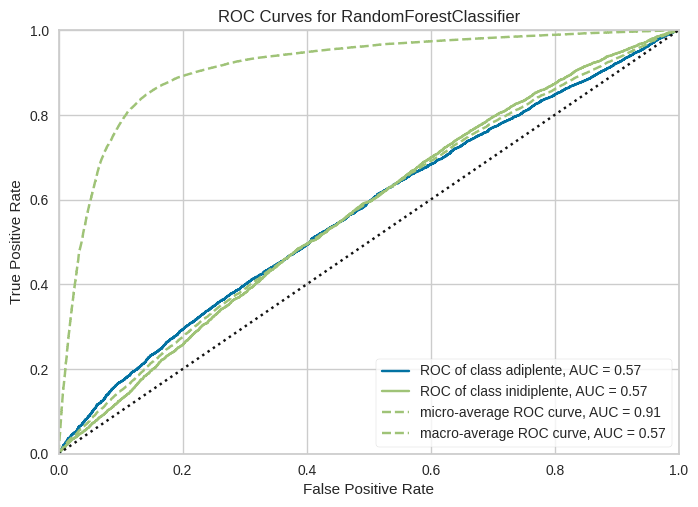

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [87]:
ROC = ROCAUC(random_clf, classes=["adiplente", "inidiplente"])

ROC.fit(xtrain, ytrain)
ROC.score(xtest, ytest)
ROC.show()

In [88]:
validacao_cruzada().validacao(xtrain, ytrain, random_clf, num_split=4)

________________________________________________________________________________
KFold 0
 > Acuracia :0.83364   f1_score : 0.18055
________________________________________________________________________________
KFold 1
 > Acuracia :0.83007   f1_score : 0.17540
________________________________________________________________________________
KFold 2
 > Acuracia :0.83062   f1_score : 0.16999
________________________________________________________________________________
KFold 3
 > Acuracia :0.83135   f1_score : 0.18403
________________________________________________________________________________
Media Acu........: 0.83135 
 Media f1_score...: 0.18403 
 Desvio Padrão Acu: 0.00136 
 Desvio Padrão f1.: 0.00531


### Logistic

In [62]:
logistic = LogisticRegression(max_iter=10_000)
logistic.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [63]:
pred_log = logistic.predict(xtest)

In [64]:
confusion_matrix(ytest, pred_log)

array([[42592,  5752],
       [ 3375,   698]])

In [65]:
print(classification_report(ytest, pred_log))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     48344
           1       0.11      0.17      0.13      4073

    accuracy                           0.83     52417
   macro avg       0.52      0.53      0.52     52417
weighted avg       0.86      0.83      0.84     52417



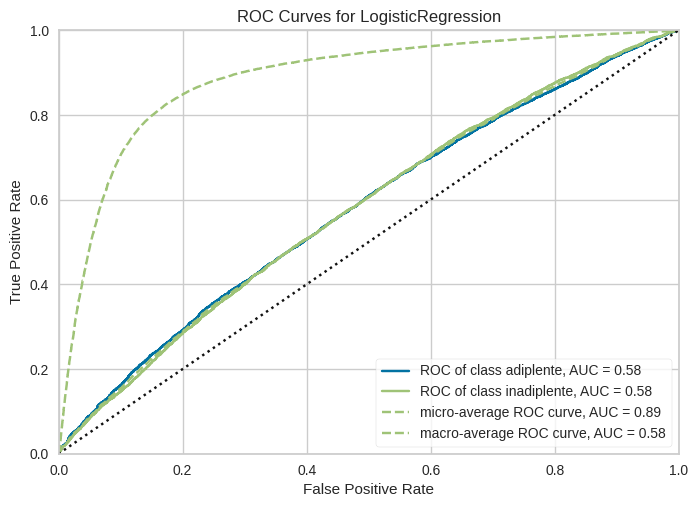

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
ROC = ROCAUC(logistic, classes=["adiplente", "inadiplente"])

ROC.fit(xtrain, ytrain)
ROC.score(xtest, ytest)
ROC.show()

#### Fazendo o test